In [2]:

import numpy as np
from funcs import system_solve

# sinewave
func = lambda x: np.sin(x) / x

Tmax = 30 # maximal time to simulate
mu = 0.002 # friction coefficient
v0 = 0 # initial velocity (scalar)
x0 = 0.5 # starting position (x coordinate)
dt = 0.01 # timestep
x_to = 16.0 # furthest possible x-coordinate

sol = system_solve(func, mu, x0, dt, Tmax)


print(sol)

[[ 7.80394269e-05  3.11523746e-04  7.00513057e-04 ...  1.06736639e+01
   1.06791257e+01  1.06845664e+01]
 [ 1.55755188e-02  3.11223466e-02  4.66771838e-02 ...  5.47230152e-01
   5.45133928e-01  5.42993778e-01]
 [ 5.00077309e-01  5.00308607e-01  5.00693954e-01 ...  1.10842013e+01
   1.10896447e+01  1.10950670e+01]
 [ 9.58838511e-01  9.58800902e-01  9.58738210e-01 ... -8.98644082e-02
  -8.97755216e-02 -8.96844231e-02]
 [-1.62560896e-01 -1.62632294e-01 -1.62751232e-01 ...  1.60927676e-02
   1.65656588e-02  1.70357749e-02]]


In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_frames = int(Tmax / dt)

time_values = np.linspace(0, Tmax, n_frames)

fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "Graph of function",
    "Slope and velocity with respect to x-position",
    "x-position with respect to time",
    "y-position with respect to time"
    ))

fig.add_trace(go.Scatter(
    x=sol[2, :],
    y=sol[3, :],
    name="graph of function"),
    row=1, col=1)

fig.add_trace(go.Scatter(
    x=sol[2, :],
    y=sol[4, :],
    name="slope wrt x"),
    row=1, col=2)

fig.add_trace(go.Scatter(
    x=sol[2, :],
    y=sol[1, :],
    name="velocity wrt x"),
    row=1, col=2)

fig.add_trace(go.Scatter(
    x=time_values,
    y=sol[2, :],
    name="x wrt time"),
    row=2, col=1)

fig.add_trace(go.Scatter(
    x=time_values,
    y=sol[3, :],
    name="y wrt time"),
    row=2, col=2)



fig.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


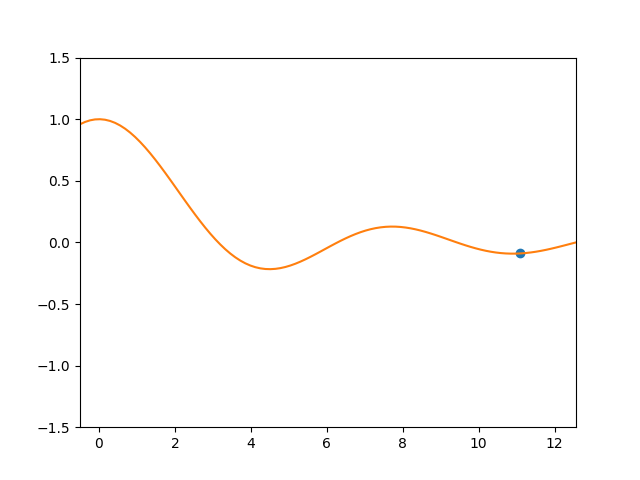

In [ ]:
%matplotlib widget
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_lower = -0.5
x_upper = 4 * np.pi
y_lower = -1.5
y_upper = 1.5

ax.set_xlim([x_lower, x_upper])
ax.set_ylim([y_lower, y_upper])

anim_plot = ax.plot([], [])
xrange = np.linspace(x_lower, x_upper, 100)
scatter = ax.scatter([], [])

ax.plot(xrange, func(xrange))

def update_frame(frame):
    # Update scatter with first 'frame+1' points
    current_x = sol[2, frame]
    current_y = sol[3, frame]
    scatter.set_offsets(np.column_stack([current_x, current_y]))
    return [scatter]

anim = FuncAnimation(fig, update_frame, frames=sol.shape[1], interval=dt * 1000 / 2, blit=True)
anim.save("anim.gif", fps=30)
